In [1]:
import networkx as nx
import pulser
import numpy

In [2]:
from iterative_mis.visualize_graph import *
from iterative_mis.utils import *
from iterative_mis.MIS_kernel import PulserMISSolver

## PCI graph coloring problem
Start from an initial graph G=(V,E), whose vertexes' positions are given. The conflicts between vertexes correspond to conflicts between antennas, the maximum distance at which a conflict can appear is set to 100km.
The straightforwad embedding on the Pasqal machine is obtained through scaling the initial positions into a circle of radius 50 μm

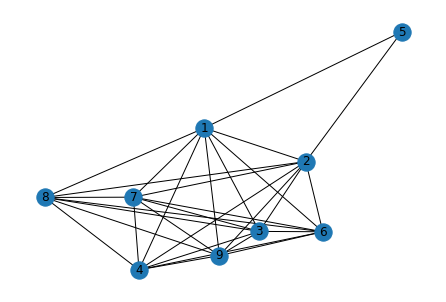

In [3]:
num_vertexes = 9    
G = nx.read_gpickle("graphs_dataset/G_{}.gpickle".format(num_vertexes))
G = plot_initial_graph_nx(G, num_vertexes)

Blockade Radius 26.57 μm


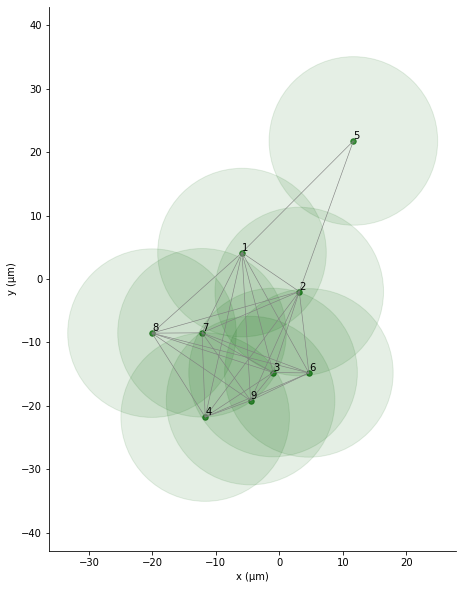

In [4]:
rabi_freq, blockade_radius = compute_rydberg(G)
print(f'Blockade Radius {blockade_radius:.2f} μm')
plot_initial_graph_pulser(G, blockade_radius)

## Greedy-itMIS
Solve iteratively MIS (Maximum Independent Set) problem to retrieve a feasible coloring. At each step a subset of independent vertexes is removed from G and a color is assigned to them.

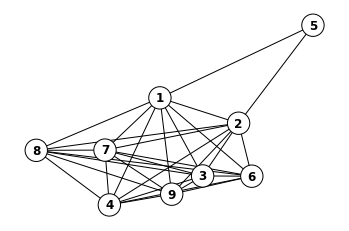

Exception: ODE integration error: Try to increase the allowed number of substeps by increasing the nsteps parameter in the Options class.

In [6]:
coloring =  dict.fromkeys(G.nodes(), -1)
num_colors = 0
orig_G = G.copy()
plot_sol(coloring, orig_G, -1)
while len(G.nodes())> 0:   
    if len(G.edges())>0: 
        # there are still conflict to be solved
        pulser_MIS_solver = PulserMISSolver(G)
        solutions = pulser_MIS_solver.solve_Pulser()
        num_sol = len(solutions)     
        print('Found {} solutions'.format(num_sol))       
        for sol in range(num_sol):  
            x = solutions[sol]      
            if is_MIS(x, G):
                # the solution is indipendent and maximal
                H, MIS_set = compute_subgraph(x, G)
                break
        G=H
    else:
        # the same color can be assigned to all the remaining nodes 
        MIS_set=G.nodes()
        G = G.subgraph([])
    num_colors+=1
    # update the coloring
    for graph_node in MIS_set:
        coloring[graph_node]=num_colors 
    plot_sol(coloring.copy(), orig_G, num_colors)
        
print('Iterative MIS solved with {} colors'.format(num_colors))  

## BB-itMIS